In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [3]:
import sklearn
sklearn.__version__

'0.24.2'

In [4]:
path = "data\T1.csv"

In [5]:
df = pd.read_csv(r"C:/Users/DELL/Desktop/New folder/T1.csv")

In [6]:
df.rename(columns={'Date/Time':'Time',
                   'LV ActivePower (kW)':'ActivePower(kW)',
                   "Wind Speed (m/s)":"WindSpeed(m/s)",
                   "Wind Direction (°)":"Wind_Direction"},
                    inplace=True)

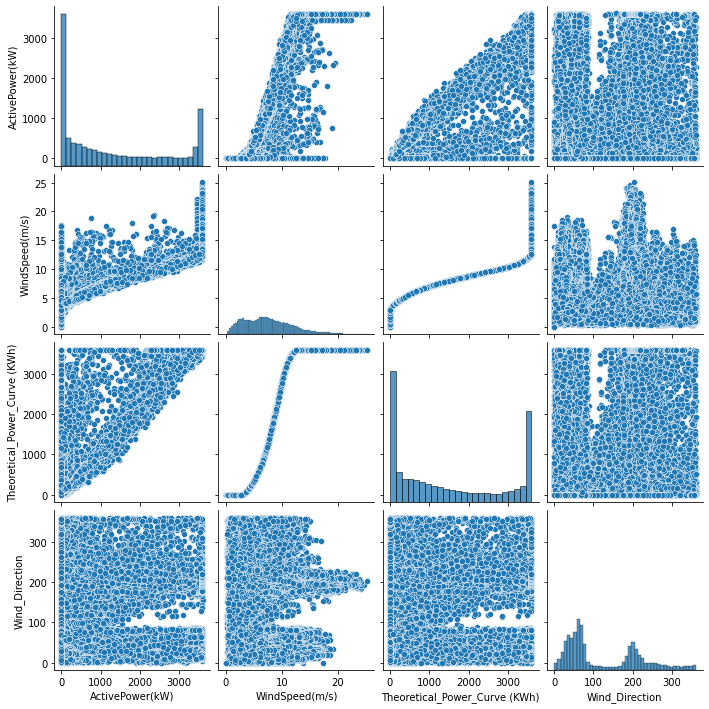

In [7]:
sns.pairplot(df)

In [8]:

corr = df.corr()

In [9]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

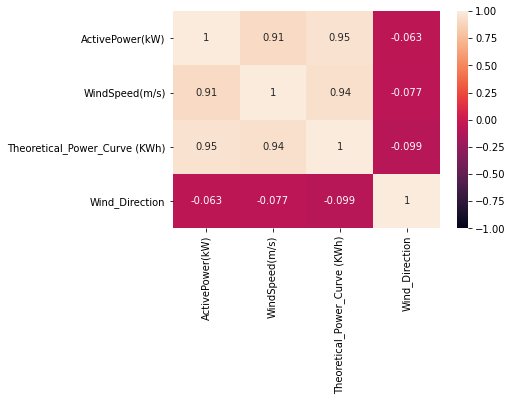

In [10]:
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

In [11]:
bottom, top = ax.get_ylim()

In [12]:
ax.set_ylim(bottom + 0.5, top - 0.5)

(4.5, -0.5)

In [13]:
plt.show()

In [14]:
corr

,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
ActivePower(kW),1.000000,0.912774,0.949918,-0.062702
WindSpeed(m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind_Direction,-0.062702,-0.077188,-0.099076,1.000000


In [15]:
#df.drop(['Wind_Direction'],axis=1,inplace = True)
df["Time"] = pd.to_datetime(df["Time"], format = "%d %m %Y %H:%M", errors = "coerce")
df

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [16]:
y = df['ActivePower(kW)'] #'Theoretical_Power_Curve (KWh)'

In [17]:
X = df[['Theoretical_Power_Curve (KWh)','WindSpeed(m/s)']]#'ActivePower(kW)'

In [18]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
from sklearn.metrics import mean_absolute_error,r2_score

In [21]:
forest_model = RandomForestRegressor(max_leaf_nodes =500, random_state=1)

In [22]:
forest_model.fit(train_X, train_y)


RandomForestRegressor(max_leaf_nodes=500, random_state=1)

In [23]:
power_preds = forest_model.predict(val_X)

In [24]:
print(mean_absolute_error(val_y, power_preds))

162.90876721041633


In [25]:
print(r2_score(val_y,power_preds))

0.9015207981707475


In [26]:
joblib.dump(forest_model, "power_prediction.sav")

['power_prediction.sav']

In [27]:
import requests
apikey="43ce69715e2133b2300e0f8f7289befd"
resp=requests.get("http://api.openweathermap.org/data/2.5/weather?q=London&appid="+apikey)
print(resp.json())
resp=resp.json()
temp=resp["main"]["temp"]
humid=resp["main"]["humidity"]
pressure=resp["main"]["pressure"]
humid=resp["wind"]["speed"]
print(temp,humid,pressure,humid)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 287.74, 'feels_like': 287.45, 'temp_min': 286.22, 'temp_max': 289.09, 'pressure': 1011, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 261, 'gust': 4.47}, 'clouds': {'all': 20}, 'dt': 1627541969, 'sys': {'type': 2, 'id': 2019646, 'country': 'GB', 'sunrise': 1627532389, 'sunset': 1627588434}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
287.74 0.89 1011 0.89


In [28]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import joblib
import requests


In [29]:
app = Flask(__name__)
model = joblib.load('power_prediction.sav')

In [30]:
@app.route('/')
def home():
    return render_template('intro.html')

In [31]:
@app.route('/predict')
def predict():
    return render_template('predict.html')
